In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans

from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
def scan_files(directory, prefix=None, postfix=None):
    files_list = []
    for root, sub_dirs, files in os.walk(directory):
        for special_file in files:
            if postfix:
                if special_file.endswith(postfix):
                    files_list.append(os.path.join(root, special_file))
            elif prefix:
                if special_file.startswith(prefix):
                    files_list.append(os.path.join(root, special_file))
            else:
                files_list.append(os.path.join(root, special_file))
    return files_list

def collect_sizes(txt_fname, size):
    sizes = []
    with open(txt_fname, 'r') as f:
        for line in f.readlines():
            tokens = line.strip().split()
            sizes.append([int(float(tokens[3])*size), int(float(tokens[4])*size)])
    return sizes

def batch_collect_sizes(txt_fnames, size):
    sizes = []
    for txt_fname in txt_fnames:
        sizes += collect_sizes(txt_fname, size)
    return sizes

def worker_single(data_path, size=608):
    txt_fnames = scan_files(data_path, postfix=".txt")
    sizes = []
    for i,txt_fname in enumerate(txt_fnames):
        if i % 10000 == 0:
            print(i)
        sizes += collect_sizes(txt_fname, size)
    return sizes

def get_file(data_path):
    if os.path.isdir(data_path):
        files = scan_files(data_path, postfix=".txt")
    else:
        files = []
        with open(data_path, 'r') as f:
            for line in f.readlines():
                files.append(os.path.splitext(line.strip())[0] + ".txt")
    return files

def worker_multip(data_path, size=608):
    files = get_file(data_path)
    print("# files:", len(files))

    executor = ProcessPoolExecutor(max_workers=8)
    tasks = []

    batch_size = 10000
    for i in range(0, len(files), batch_size):
        batch = files[i : i+batch_size]
        tasks.append(executor.submit(batch_collect_sizes, batch, size))
    
    sizes = []
    job_count = len(tasks)
    for future in as_completed(tasks):
        result = future.result()  # get the returning result from calling fuction
        sizes += result
        job_count -= 1
        print("One Job Done, Remaining Job Count: %s, Files collected: %d" % (job_count, len(sizes)))
        
    return sizes

In [3]:
data_path = "/home/ssd_array0/Data/batch6.4_1216/train-gnet2.txt"
sizes = worker_multip(data_path)

print("# files", len(sizes))

# files: 5012555
One Job Done, Remaining Job Count: 501, Files collected: 19100
One Job Done, Remaining Job Count: 500, Files collected: 38067
One Job Done, Remaining Job Count: 499, Files collected: 57058
One Job Done, Remaining Job Count: 498, Files collected: 76071
One Job Done, Remaining Job Count: 497, Files collected: 95280
One Job Done, Remaining Job Count: 496, Files collected: 114253
One Job Done, Remaining Job Count: 495, Files collected: 133497
One Job Done, Remaining Job Count: 494, Files collected: 152529
One Job Done, Remaining Job Count: 493, Files collected: 171957
One Job Done, Remaining Job Count: 492, Files collected: 191163
One Job Done, Remaining Job Count: 491, Files collected: 210732
One Job Done, Remaining Job Count: 490, Files collected: 229681
One Job Done, Remaining Job Count: 489, Files collected: 249094
One Job Done, Remaining Job Count: 488, Files collected: 268512
One Job Done, Remaining Job Count: 487, Files collected: 287917
One Job Done, Remaining Job 

One Job Done, Remaining Job Count: 373, Files collected: 2472075
One Job Done, Remaining Job Count: 372, Files collected: 2491263
One Job Done, Remaining Job Count: 371, Files collected: 2510572
One Job Done, Remaining Job Count: 370, Files collected: 2529823
One Job Done, Remaining Job Count: 369, Files collected: 2549645
One Job Done, Remaining Job Count: 368, Files collected: 2568822
One Job Done, Remaining Job Count: 367, Files collected: 2588254
One Job Done, Remaining Job Count: 366, Files collected: 2607735
One Job Done, Remaining Job Count: 365, Files collected: 2626660
One Job Done, Remaining Job Count: 364, Files collected: 2645338
One Job Done, Remaining Job Count: 363, Files collected: 2664548
One Job Done, Remaining Job Count: 362, Files collected: 2683818
One Job Done, Remaining Job Count: 361, Files collected: 2703138
One Job Done, Remaining Job Count: 360, Files collected: 2722317
One Job Done, Remaining Job Count: 359, Files collected: 2741160
One Job Done, Remaining J

One Job Done, Remaining Job Count: 246, Files collected: 4901482
One Job Done, Remaining Job Count: 245, Files collected: 4920522
One Job Done, Remaining Job Count: 244, Files collected: 4939544
One Job Done, Remaining Job Count: 243, Files collected: 4958368
One Job Done, Remaining Job Count: 242, Files collected: 4977154
One Job Done, Remaining Job Count: 241, Files collected: 4996193
One Job Done, Remaining Job Count: 240, Files collected: 5015722
One Job Done, Remaining Job Count: 239, Files collected: 5034518
One Job Done, Remaining Job Count: 238, Files collected: 5053698
One Job Done, Remaining Job Count: 237, Files collected: 5072959
One Job Done, Remaining Job Count: 236, Files collected: 5092015
One Job Done, Remaining Job Count: 235, Files collected: 5110907
One Job Done, Remaining Job Count: 234, Files collected: 5130185
One Job Done, Remaining Job Count: 233, Files collected: 5149709
One Job Done, Remaining Job Count: 232, Files collected: 5169205
One Job Done, Remaining J

One Job Done, Remaining Job Count: 119, Files collected: 7332985
One Job Done, Remaining Job Count: 118, Files collected: 7352062
One Job Done, Remaining Job Count: 117, Files collected: 7371274
One Job Done, Remaining Job Count: 116, Files collected: 7390628
One Job Done, Remaining Job Count: 115, Files collected: 7409690
One Job Done, Remaining Job Count: 114, Files collected: 7428595
One Job Done, Remaining Job Count: 113, Files collected: 7447671
One Job Done, Remaining Job Count: 112, Files collected: 7466831
One Job Done, Remaining Job Count: 111, Files collected: 7486634
One Job Done, Remaining Job Count: 110, Files collected: 7506360
One Job Done, Remaining Job Count: 109, Files collected: 7525848
One Job Done, Remaining Job Count: 108, Files collected: 7544853
One Job Done, Remaining Job Count: 107, Files collected: 7564396
One Job Done, Remaining Job Count: 106, Files collected: 7583546
One Job Done, Remaining Job Count: 105, Files collected: 7602906
One Job Done, Remaining J

In [8]:
# collects sizes from additional folder
data_path = "/home/hdd_array0/batch6.4/batch6.3-rest.txt"
sizes2 = worker_multip(data_path)
print("# files", len(sizes2))

sizes += sizes2
print("# files", len(sizes))

# files: 5650920
One Job Done, Remaining Job Count: 5650, Files collected: 2065
One Job Done, Remaining Job Count: 5649, Files collected: 4194
One Job Done, Remaining Job Count: 5648, Files collected: 6144
One Job Done, Remaining Job Count: 5647, Files collected: 8231
One Job Done, Remaining Job Count: 5646, Files collected: 10331
One Job Done, Remaining Job Count: 5645, Files collected: 12202
One Job Done, Remaining Job Count: 5644, Files collected: 14166
One Job Done, Remaining Job Count: 5643, Files collected: 16213
One Job Done, Remaining Job Count: 5642, Files collected: 18067
One Job Done, Remaining Job Count: 5641, Files collected: 20039
One Job Done, Remaining Job Count: 5640, Files collected: 22128
One Job Done, Remaining Job Count: 5639, Files collected: 24218
One Job Done, Remaining Job Count: 5638, Files collected: 26134
One Job Done, Remaining Job Count: 5637, Files collected: 28350
One Job Done, Remaining Job Count: 5636, Files collected: 30440
One Job Done, Remaining Job

One Job Done, Remaining Job Count: 5523, Files collected: 261291
One Job Done, Remaining Job Count: 5522, Files collected: 263467
One Job Done, Remaining Job Count: 5521, Files collected: 265660
One Job Done, Remaining Job Count: 5520, Files collected: 267582
One Job Done, Remaining Job Count: 5519, Files collected: 269562
One Job Done, Remaining Job Count: 5518, Files collected: 271561
One Job Done, Remaining Job Count: 5517, Files collected: 273711
One Job Done, Remaining Job Count: 5516, Files collected: 275806
One Job Done, Remaining Job Count: 5515, Files collected: 277781
One Job Done, Remaining Job Count: 5514, Files collected: 279755
One Job Done, Remaining Job Count: 5513, Files collected: 281842
One Job Done, Remaining Job Count: 5512, Files collected: 283764
One Job Done, Remaining Job Count: 5511, Files collected: 285716
One Job Done, Remaining Job Count: 5510, Files collected: 287645
One Job Done, Remaining Job Count: 5509, Files collected: 289661
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5396, Files collected: 518971
One Job Done, Remaining Job Count: 5395, Files collected: 521002
One Job Done, Remaining Job Count: 5394, Files collected: 523032
One Job Done, Remaining Job Count: 5393, Files collected: 525024
One Job Done, Remaining Job Count: 5392, Files collected: 526952
One Job Done, Remaining Job Count: 5391, Files collected: 528905
One Job Done, Remaining Job Count: 5390, Files collected: 530964
One Job Done, Remaining Job Count: 5389, Files collected: 533072
One Job Done, Remaining Job Count: 5388, Files collected: 534979
One Job Done, Remaining Job Count: 5387, Files collected: 537080
One Job Done, Remaining Job Count: 5386, Files collected: 539261
One Job Done, Remaining Job Count: 5385, Files collected: 541212
One Job Done, Remaining Job Count: 5384, Files collected: 543252
One Job Done, Remaining Job Count: 5383, Files collected: 545268
One Job Done, Remaining Job Count: 5382, Files collected: 547356
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5268, Files collected: 779293
One Job Done, Remaining Job Count: 5267, Files collected: 781311
One Job Done, Remaining Job Count: 5266, Files collected: 783352
One Job Done, Remaining Job Count: 5265, Files collected: 785422
One Job Done, Remaining Job Count: 5264, Files collected: 787557
One Job Done, Remaining Job Count: 5263, Files collected: 789584
One Job Done, Remaining Job Count: 5262, Files collected: 791626
One Job Done, Remaining Job Count: 5261, Files collected: 793561
One Job Done, Remaining Job Count: 5260, Files collected: 795569
One Job Done, Remaining Job Count: 5259, Files collected: 797576
One Job Done, Remaining Job Count: 5258, Files collected: 799606
One Job Done, Remaining Job Count: 5257, Files collected: 801678
One Job Done, Remaining Job Count: 5256, Files collected: 803732
One Job Done, Remaining Job Count: 5255, Files collected: 805864
One Job Done, Remaining Job Count: 5254, Files collected: 807782
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5142, Files collected: 1037250
One Job Done, Remaining Job Count: 5141, Files collected: 1039290
One Job Done, Remaining Job Count: 5140, Files collected: 1041442
One Job Done, Remaining Job Count: 5139, Files collected: 1043523
One Job Done, Remaining Job Count: 5138, Files collected: 1045572
One Job Done, Remaining Job Count: 5137, Files collected: 1047515
One Job Done, Remaining Job Count: 5136, Files collected: 1049514
One Job Done, Remaining Job Count: 5135, Files collected: 1051475
One Job Done, Remaining Job Count: 5134, Files collected: 1053571
One Job Done, Remaining Job Count: 5133, Files collected: 1055642
One Job Done, Remaining Job Count: 5132, Files collected: 1057812
One Job Done, Remaining Job Count: 5131, Files collected: 1060027
One Job Done, Remaining Job Count: 5130, Files collected: 1062136
One Job Done, Remaining Job Count: 5129, Files collected: 1064243
One Job Done, Remaining Job Count: 5128, Files collected: 1066250
One Job Do

One Job Done, Remaining Job Count: 5016, Files collected: 1294688
One Job Done, Remaining Job Count: 5015, Files collected: 1296754
One Job Done, Remaining Job Count: 5014, Files collected: 1298778
One Job Done, Remaining Job Count: 5013, Files collected: 1300781
One Job Done, Remaining Job Count: 5012, Files collected: 1302748
One Job Done, Remaining Job Count: 5011, Files collected: 1304791
One Job Done, Remaining Job Count: 5010, Files collected: 1306766
One Job Done, Remaining Job Count: 5009, Files collected: 1308745
One Job Done, Remaining Job Count: 5008, Files collected: 1310783
One Job Done, Remaining Job Count: 5007, Files collected: 1312797
One Job Done, Remaining Job Count: 5006, Files collected: 1314917
One Job Done, Remaining Job Count: 5005, Files collected: 1316915
One Job Done, Remaining Job Count: 5004, Files collected: 1318836
One Job Done, Remaining Job Count: 5003, Files collected: 1320869
One Job Done, Remaining Job Count: 5002, Files collected: 1322991
One Job Do

One Job Done, Remaining Job Count: 4891, Files collected: 1548271
One Job Done, Remaining Job Count: 4890, Files collected: 1550348
One Job Done, Remaining Job Count: 4889, Files collected: 1552353
One Job Done, Remaining Job Count: 4888, Files collected: 1554426
One Job Done, Remaining Job Count: 4887, Files collected: 1556363
One Job Done, Remaining Job Count: 4886, Files collected: 1558395
One Job Done, Remaining Job Count: 4885, Files collected: 1560497
One Job Done, Remaining Job Count: 4884, Files collected: 1562584
One Job Done, Remaining Job Count: 4883, Files collected: 1564733
One Job Done, Remaining Job Count: 4882, Files collected: 1566697
One Job Done, Remaining Job Count: 4881, Files collected: 1568673
One Job Done, Remaining Job Count: 4880, Files collected: 1570619
One Job Done, Remaining Job Count: 4879, Files collected: 1572529
One Job Done, Remaining Job Count: 4878, Files collected: 1574636
One Job Done, Remaining Job Count: 4877, Files collected: 1576657
One Job Do

One Job Done, Remaining Job Count: 4766, Files collected: 1803658
One Job Done, Remaining Job Count: 4765, Files collected: 1805652
One Job Done, Remaining Job Count: 4764, Files collected: 1807577
One Job Done, Remaining Job Count: 4763, Files collected: 1809571
One Job Done, Remaining Job Count: 4762, Files collected: 1811495
One Job Done, Remaining Job Count: 4761, Files collected: 1813647
One Job Done, Remaining Job Count: 4760, Files collected: 1815588
One Job Done, Remaining Job Count: 4759, Files collected: 1817620
One Job Done, Remaining Job Count: 4758, Files collected: 1819669
One Job Done, Remaining Job Count: 4757, Files collected: 1821614
One Job Done, Remaining Job Count: 4756, Files collected: 1823593
One Job Done, Remaining Job Count: 4755, Files collected: 1825518
One Job Done, Remaining Job Count: 4754, Files collected: 1827512
One Job Done, Remaining Job Count: 4753, Files collected: 1829540
One Job Done, Remaining Job Count: 4752, Files collected: 1831459
One Job Do

One Job Done, Remaining Job Count: 4641, Files collected: 2059058
One Job Done, Remaining Job Count: 4640, Files collected: 2061025
One Job Done, Remaining Job Count: 4639, Files collected: 2063258
One Job Done, Remaining Job Count: 4638, Files collected: 2065305
One Job Done, Remaining Job Count: 4637, Files collected: 2067328
One Job Done, Remaining Job Count: 4636, Files collected: 2069277
One Job Done, Remaining Job Count: 4635, Files collected: 2071466
One Job Done, Remaining Job Count: 4634, Files collected: 2073538
One Job Done, Remaining Job Count: 4633, Files collected: 2075490
One Job Done, Remaining Job Count: 4632, Files collected: 2077666
One Job Done, Remaining Job Count: 4631, Files collected: 2079815
One Job Done, Remaining Job Count: 4630, Files collected: 2081841
One Job Done, Remaining Job Count: 4629, Files collected: 2083788
One Job Done, Remaining Job Count: 4628, Files collected: 2085962
One Job Done, Remaining Job Count: 4627, Files collected: 2087760
One Job Do

One Job Done, Remaining Job Count: 4516, Files collected: 2312562
One Job Done, Remaining Job Count: 4515, Files collected: 2314795
One Job Done, Remaining Job Count: 4514, Files collected: 2316782
One Job Done, Remaining Job Count: 4513, Files collected: 2318815
One Job Done, Remaining Job Count: 4512, Files collected: 2320984
One Job Done, Remaining Job Count: 4511, Files collected: 2323039
One Job Done, Remaining Job Count: 4510, Files collected: 2325038
One Job Done, Remaining Job Count: 4509, Files collected: 2327213
One Job Done, Remaining Job Count: 4508, Files collected: 2329303
One Job Done, Remaining Job Count: 4507, Files collected: 2331341
One Job Done, Remaining Job Count: 4506, Files collected: 2333442
One Job Done, Remaining Job Count: 4505, Files collected: 2335465
One Job Done, Remaining Job Count: 4504, Files collected: 2337497
One Job Done, Remaining Job Count: 4503, Files collected: 2339474
One Job Done, Remaining Job Count: 4502, Files collected: 2341556
One Job Do

One Job Done, Remaining Job Count: 4391, Files collected: 2568199
One Job Done, Remaining Job Count: 4390, Files collected: 2570119
One Job Done, Remaining Job Count: 4389, Files collected: 2572252
One Job Done, Remaining Job Count: 4388, Files collected: 2574113
One Job Done, Remaining Job Count: 4387, Files collected: 2576113
One Job Done, Remaining Job Count: 4386, Files collected: 2578270
One Job Done, Remaining Job Count: 4385, Files collected: 2580425
One Job Done, Remaining Job Count: 4384, Files collected: 2582416
One Job Done, Remaining Job Count: 4383, Files collected: 2584601
One Job Done, Remaining Job Count: 4382, Files collected: 2586685
One Job Done, Remaining Job Count: 4381, Files collected: 2588696
One Job Done, Remaining Job Count: 4380, Files collected: 2590879
One Job Done, Remaining Job Count: 4379, Files collected: 2592925
One Job Done, Remaining Job Count: 4378, Files collected: 2594825
One Job Done, Remaining Job Count: 4377, Files collected: 2596768
One Job Do

One Job Done, Remaining Job Count: 4266, Files collected: 2821362
One Job Done, Remaining Job Count: 4265, Files collected: 2823413
One Job Done, Remaining Job Count: 4264, Files collected: 2825350
One Job Done, Remaining Job Count: 4263, Files collected: 2827356
One Job Done, Remaining Job Count: 4262, Files collected: 2829419
One Job Done, Remaining Job Count: 4261, Files collected: 2831372
One Job Done, Remaining Job Count: 4260, Files collected: 2833439
One Job Done, Remaining Job Count: 4259, Files collected: 2835620
One Job Done, Remaining Job Count: 4258, Files collected: 2837631
One Job Done, Remaining Job Count: 4257, Files collected: 2839716
One Job Done, Remaining Job Count: 4256, Files collected: 2841716
One Job Done, Remaining Job Count: 4255, Files collected: 2843699
One Job Done, Remaining Job Count: 4254, Files collected: 2845712
One Job Done, Remaining Job Count: 4253, Files collected: 2847783
One Job Done, Remaining Job Count: 4252, Files collected: 2849795
One Job Do

One Job Done, Remaining Job Count: 4141, Files collected: 3077185
One Job Done, Remaining Job Count: 4140, Files collected: 3079199
One Job Done, Remaining Job Count: 4139, Files collected: 3081285
One Job Done, Remaining Job Count: 4138, Files collected: 3083375
One Job Done, Remaining Job Count: 4137, Files collected: 3085469
One Job Done, Remaining Job Count: 4136, Files collected: 3087534
One Job Done, Remaining Job Count: 4135, Files collected: 3089510
One Job Done, Remaining Job Count: 4134, Files collected: 3091653
One Job Done, Remaining Job Count: 4133, Files collected: 3093622
One Job Done, Remaining Job Count: 4132, Files collected: 3095618
One Job Done, Remaining Job Count: 4131, Files collected: 3097707
One Job Done, Remaining Job Count: 4130, Files collected: 3099856
One Job Done, Remaining Job Count: 4129, Files collected: 3101836
One Job Done, Remaining Job Count: 4128, Files collected: 3103798
One Job Done, Remaining Job Count: 4127, Files collected: 3105990
One Job Do

One Job Done, Remaining Job Count: 4016, Files collected: 3332474
One Job Done, Remaining Job Count: 4015, Files collected: 3334417
One Job Done, Remaining Job Count: 4014, Files collected: 3336455
One Job Done, Remaining Job Count: 4013, Files collected: 3338627
One Job Done, Remaining Job Count: 4012, Files collected: 3340589
One Job Done, Remaining Job Count: 4011, Files collected: 3342787
One Job Done, Remaining Job Count: 4010, Files collected: 3344773
One Job Done, Remaining Job Count: 4009, Files collected: 3346766
One Job Done, Remaining Job Count: 4008, Files collected: 3348712
One Job Done, Remaining Job Count: 4007, Files collected: 3350740
One Job Done, Remaining Job Count: 4006, Files collected: 3352797
One Job Done, Remaining Job Count: 4005, Files collected: 3354884
One Job Done, Remaining Job Count: 4004, Files collected: 3356902
One Job Done, Remaining Job Count: 4003, Files collected: 3358999
One Job Done, Remaining Job Count: 4002, Files collected: 3360941
One Job Do

One Job Done, Remaining Job Count: 3891, Files collected: 3586563
One Job Done, Remaining Job Count: 3890, Files collected: 3588701
One Job Done, Remaining Job Count: 3889, Files collected: 3590729
One Job Done, Remaining Job Count: 3888, Files collected: 3592709
One Job Done, Remaining Job Count: 3887, Files collected: 3594631
One Job Done, Remaining Job Count: 3886, Files collected: 3596742
One Job Done, Remaining Job Count: 3885, Files collected: 3598897
One Job Done, Remaining Job Count: 3884, Files collected: 3600938
One Job Done, Remaining Job Count: 3883, Files collected: 3602928
One Job Done, Remaining Job Count: 3882, Files collected: 3605051
One Job Done, Remaining Job Count: 3881, Files collected: 3607148
One Job Done, Remaining Job Count: 3880, Files collected: 3609253
One Job Done, Remaining Job Count: 3879, Files collected: 3611380
One Job Done, Remaining Job Count: 3878, Files collected: 3613590
One Job Done, Remaining Job Count: 3877, Files collected: 3615723
One Job Do

One Job Done, Remaining Job Count: 3766, Files collected: 3840848
One Job Done, Remaining Job Count: 3765, Files collected: 3842927
One Job Done, Remaining Job Count: 3764, Files collected: 3845097
One Job Done, Remaining Job Count: 3763, Files collected: 3847141
One Job Done, Remaining Job Count: 3762, Files collected: 3849025
One Job Done, Remaining Job Count: 3761, Files collected: 3851037
One Job Done, Remaining Job Count: 3760, Files collected: 3853032
One Job Done, Remaining Job Count: 3759, Files collected: 3855055
One Job Done, Remaining Job Count: 3758, Files collected: 3857055
One Job Done, Remaining Job Count: 3757, Files collected: 3858987
One Job Done, Remaining Job Count: 3756, Files collected: 3861090
One Job Done, Remaining Job Count: 3755, Files collected: 3863181
One Job Done, Remaining Job Count: 3754, Files collected: 3865198
One Job Done, Remaining Job Count: 3753, Files collected: 3867260
One Job Done, Remaining Job Count: 3752, Files collected: 3869378
One Job Do

One Job Done, Remaining Job Count: 3641, Files collected: 4096068
One Job Done, Remaining Job Count: 3640, Files collected: 4098059
One Job Done, Remaining Job Count: 3639, Files collected: 4100256
One Job Done, Remaining Job Count: 3638, Files collected: 4102148
One Job Done, Remaining Job Count: 3637, Files collected: 4104231
One Job Done, Remaining Job Count: 3636, Files collected: 4106227
One Job Done, Remaining Job Count: 3635, Files collected: 4108297
One Job Done, Remaining Job Count: 3634, Files collected: 4110382
One Job Done, Remaining Job Count: 3633, Files collected: 4112397
One Job Done, Remaining Job Count: 3632, Files collected: 4114547
One Job Done, Remaining Job Count: 3631, Files collected: 4116628
One Job Done, Remaining Job Count: 3630, Files collected: 4118672
One Job Done, Remaining Job Count: 3629, Files collected: 4120637
One Job Done, Remaining Job Count: 3628, Files collected: 4122596
One Job Done, Remaining Job Count: 3627, Files collected: 4124710
One Job Do

One Job Done, Remaining Job Count: 3516, Files collected: 4349604
One Job Done, Remaining Job Count: 3515, Files collected: 4351819
One Job Done, Remaining Job Count: 3514, Files collected: 4353780
One Job Done, Remaining Job Count: 3513, Files collected: 4355831
One Job Done, Remaining Job Count: 3512, Files collected: 4357846
One Job Done, Remaining Job Count: 3511, Files collected: 4359876
One Job Done, Remaining Job Count: 3510, Files collected: 4361834
One Job Done, Remaining Job Count: 3509, Files collected: 4364019
One Job Done, Remaining Job Count: 3508, Files collected: 4365940
One Job Done, Remaining Job Count: 3507, Files collected: 4367910
One Job Done, Remaining Job Count: 3506, Files collected: 4369904
One Job Done, Remaining Job Count: 3505, Files collected: 4371901
One Job Done, Remaining Job Count: 3504, Files collected: 4374003
One Job Done, Remaining Job Count: 3503, Files collected: 4375975
One Job Done, Remaining Job Count: 3502, Files collected: 4377962
One Job Do

One Job Done, Remaining Job Count: 3391, Files collected: 4603898
One Job Done, Remaining Job Count: 3390, Files collected: 4605867
One Job Done, Remaining Job Count: 3389, Files collected: 4607890
One Job Done, Remaining Job Count: 3388, Files collected: 4609865
One Job Done, Remaining Job Count: 3387, Files collected: 4611881
One Job Done, Remaining Job Count: 3386, Files collected: 4613869
One Job Done, Remaining Job Count: 3385, Files collected: 4615911
One Job Done, Remaining Job Count: 3384, Files collected: 4617920
One Job Done, Remaining Job Count: 3383, Files collected: 4619961
One Job Done, Remaining Job Count: 3382, Files collected: 4621884
One Job Done, Remaining Job Count: 3381, Files collected: 4623997
One Job Done, Remaining Job Count: 3380, Files collected: 4626078
One Job Done, Remaining Job Count: 3379, Files collected: 4628224
One Job Done, Remaining Job Count: 3378, Files collected: 4630237
One Job Done, Remaining Job Count: 3377, Files collected: 4632496
One Job Do

One Job Done, Remaining Job Count: 3266, Files collected: 4857969
One Job Done, Remaining Job Count: 3265, Files collected: 4860107
One Job Done, Remaining Job Count: 3264, Files collected: 4862262
One Job Done, Remaining Job Count: 3263, Files collected: 4864234
One Job Done, Remaining Job Count: 3262, Files collected: 4866150
One Job Done, Remaining Job Count: 3261, Files collected: 4868136
One Job Done, Remaining Job Count: 3260, Files collected: 4870322
One Job Done, Remaining Job Count: 3259, Files collected: 4872341
One Job Done, Remaining Job Count: 3258, Files collected: 4874448
One Job Done, Remaining Job Count: 3257, Files collected: 4876444
One Job Done, Remaining Job Count: 3256, Files collected: 4878599
One Job Done, Remaining Job Count: 3255, Files collected: 4880563
One Job Done, Remaining Job Count: 3254, Files collected: 4882668
One Job Done, Remaining Job Count: 3253, Files collected: 4884745
One Job Done, Remaining Job Count: 3252, Files collected: 4886789
One Job Do

One Job Done, Remaining Job Count: 3141, Files collected: 5112049
One Job Done, Remaining Job Count: 3140, Files collected: 5114149
One Job Done, Remaining Job Count: 3139, Files collected: 5116074
One Job Done, Remaining Job Count: 3138, Files collected: 5118068
One Job Done, Remaining Job Count: 3137, Files collected: 5120271
One Job Done, Remaining Job Count: 3136, Files collected: 5122223
One Job Done, Remaining Job Count: 3135, Files collected: 5124257
One Job Done, Remaining Job Count: 3134, Files collected: 5126182
One Job Done, Remaining Job Count: 3133, Files collected: 5128184
One Job Done, Remaining Job Count: 3132, Files collected: 5130243
One Job Done, Remaining Job Count: 3131, Files collected: 5132261
One Job Done, Remaining Job Count: 3130, Files collected: 5134348
One Job Done, Remaining Job Count: 3129, Files collected: 5136283
One Job Done, Remaining Job Count: 3128, Files collected: 5138234
One Job Done, Remaining Job Count: 3127, Files collected: 5140297
One Job Do

One Job Done, Remaining Job Count: 3016, Files collected: 5368185
One Job Done, Remaining Job Count: 3015, Files collected: 5370159
One Job Done, Remaining Job Count: 3014, Files collected: 5372111
One Job Done, Remaining Job Count: 3013, Files collected: 5374031
One Job Done, Remaining Job Count: 3012, Files collected: 5375998
One Job Done, Remaining Job Count: 3011, Files collected: 5378060
One Job Done, Remaining Job Count: 3010, Files collected: 5380075
One Job Done, Remaining Job Count: 3009, Files collected: 5382071
One Job Done, Remaining Job Count: 3008, Files collected: 5384181
One Job Done, Remaining Job Count: 3007, Files collected: 5386217
One Job Done, Remaining Job Count: 3006, Files collected: 5388384
One Job Done, Remaining Job Count: 3005, Files collected: 5390434
One Job Done, Remaining Job Count: 3004, Files collected: 5392493
One Job Done, Remaining Job Count: 3003, Files collected: 5394614
One Job Done, Remaining Job Count: 3002, Files collected: 5396687
One Job Do

One Job Done, Remaining Job Count: 2891, Files collected: 5620992
One Job Done, Remaining Job Count: 2890, Files collected: 5623022
One Job Done, Remaining Job Count: 2889, Files collected: 5624975
One Job Done, Remaining Job Count: 2888, Files collected: 5627159
One Job Done, Remaining Job Count: 2887, Files collected: 5629329
One Job Done, Remaining Job Count: 2886, Files collected: 5631397
One Job Done, Remaining Job Count: 2885, Files collected: 5633427
One Job Done, Remaining Job Count: 2884, Files collected: 5635399
One Job Done, Remaining Job Count: 2883, Files collected: 5637323
One Job Done, Remaining Job Count: 2882, Files collected: 5639347
One Job Done, Remaining Job Count: 2881, Files collected: 5641323
One Job Done, Remaining Job Count: 2880, Files collected: 5643296
One Job Done, Remaining Job Count: 2879, Files collected: 5645399
One Job Done, Remaining Job Count: 2878, Files collected: 5647439
One Job Done, Remaining Job Count: 2877, Files collected: 5649637
One Job Do

One Job Done, Remaining Job Count: 2766, Files collected: 5876434
One Job Done, Remaining Job Count: 2765, Files collected: 5878611
One Job Done, Remaining Job Count: 2764, Files collected: 5880706
One Job Done, Remaining Job Count: 2763, Files collected: 5882744
One Job Done, Remaining Job Count: 2762, Files collected: 5884844
One Job Done, Remaining Job Count: 2761, Files collected: 5886950
One Job Done, Remaining Job Count: 2760, Files collected: 5888961
One Job Done, Remaining Job Count: 2759, Files collected: 5891025
One Job Done, Remaining Job Count: 2758, Files collected: 5893016
One Job Done, Remaining Job Count: 2757, Files collected: 5895027
One Job Done, Remaining Job Count: 2756, Files collected: 5897053
One Job Done, Remaining Job Count: 2755, Files collected: 5899091
One Job Done, Remaining Job Count: 2754, Files collected: 5900971
One Job Done, Remaining Job Count: 2753, Files collected: 5903027
One Job Done, Remaining Job Count: 2752, Files collected: 5905188
One Job Do

One Job Done, Remaining Job Count: 2641, Files collected: 6131356
One Job Done, Remaining Job Count: 2640, Files collected: 6133428
One Job Done, Remaining Job Count: 2639, Files collected: 6135444
One Job Done, Remaining Job Count: 2638, Files collected: 6137447
One Job Done, Remaining Job Count: 2637, Files collected: 6139580
One Job Done, Remaining Job Count: 2636, Files collected: 6141667
One Job Done, Remaining Job Count: 2635, Files collected: 6143843
One Job Done, Remaining Job Count: 2634, Files collected: 6145939
One Job Done, Remaining Job Count: 2633, Files collected: 6147871
One Job Done, Remaining Job Count: 2632, Files collected: 6149894
One Job Done, Remaining Job Count: 2631, Files collected: 6151893
One Job Done, Remaining Job Count: 2630, Files collected: 6154068
One Job Done, Remaining Job Count: 2629, Files collected: 6156142
One Job Done, Remaining Job Count: 2628, Files collected: 6158105
One Job Done, Remaining Job Count: 2627, Files collected: 6160105
One Job Do

One Job Done, Remaining Job Count: 2516, Files collected: 6388728
One Job Done, Remaining Job Count: 2515, Files collected: 6390724
One Job Done, Remaining Job Count: 2514, Files collected: 6392607
One Job Done, Remaining Job Count: 2513, Files collected: 6394643
One Job Done, Remaining Job Count: 2512, Files collected: 6396633
One Job Done, Remaining Job Count: 2511, Files collected: 6398454
One Job Done, Remaining Job Count: 2510, Files collected: 6400434
One Job Done, Remaining Job Count: 2509, Files collected: 6402311
One Job Done, Remaining Job Count: 2508, Files collected: 6404298
One Job Done, Remaining Job Count: 2507, Files collected: 6406408
One Job Done, Remaining Job Count: 2506, Files collected: 6408346
One Job Done, Remaining Job Count: 2505, Files collected: 6410373
One Job Done, Remaining Job Count: 2504, Files collected: 6412353
One Job Done, Remaining Job Count: 2503, Files collected: 6414454
One Job Done, Remaining Job Count: 2502, Files collected: 6416511
One Job Do

One Job Done, Remaining Job Count: 2391, Files collected: 6642757
One Job Done, Remaining Job Count: 2390, Files collected: 6644785
One Job Done, Remaining Job Count: 2389, Files collected: 6646970
One Job Done, Remaining Job Count: 2388, Files collected: 6648881
One Job Done, Remaining Job Count: 2387, Files collected: 6650919
One Job Done, Remaining Job Count: 2386, Files collected: 6652905
One Job Done, Remaining Job Count: 2385, Files collected: 6654853
One Job Done, Remaining Job Count: 2384, Files collected: 6656969
One Job Done, Remaining Job Count: 2383, Files collected: 6659056
One Job Done, Remaining Job Count: 2382, Files collected: 6661324
One Job Done, Remaining Job Count: 2381, Files collected: 6663307
One Job Done, Remaining Job Count: 2380, Files collected: 6665308
One Job Done, Remaining Job Count: 2379, Files collected: 6667333
One Job Done, Remaining Job Count: 2378, Files collected: 6669485
One Job Done, Remaining Job Count: 2377, Files collected: 6671614
One Job Do

One Job Done, Remaining Job Count: 2266, Files collected: 6896145
One Job Done, Remaining Job Count: 2265, Files collected: 6898171
One Job Done, Remaining Job Count: 2264, Files collected: 6900200
One Job Done, Remaining Job Count: 2263, Files collected: 6902281
One Job Done, Remaining Job Count: 2262, Files collected: 6904369
One Job Done, Remaining Job Count: 2261, Files collected: 6906392
One Job Done, Remaining Job Count: 2260, Files collected: 6908506
One Job Done, Remaining Job Count: 2259, Files collected: 6910672
One Job Done, Remaining Job Count: 2258, Files collected: 6912791
One Job Done, Remaining Job Count: 2257, Files collected: 6914824
One Job Done, Remaining Job Count: 2256, Files collected: 6916870
One Job Done, Remaining Job Count: 2255, Files collected: 6918920
One Job Done, Remaining Job Count: 2254, Files collected: 6920842
One Job Done, Remaining Job Count: 2253, Files collected: 6922859
One Job Done, Remaining Job Count: 2252, Files collected: 6924780
One Job Do

One Job Done, Remaining Job Count: 2141, Files collected: 7151522
One Job Done, Remaining Job Count: 2140, Files collected: 7153591
One Job Done, Remaining Job Count: 2139, Files collected: 7155399
One Job Done, Remaining Job Count: 2138, Files collected: 7157390
One Job Done, Remaining Job Count: 2137, Files collected: 7159407
One Job Done, Remaining Job Count: 2136, Files collected: 7161423
One Job Done, Remaining Job Count: 2135, Files collected: 7163548
One Job Done, Remaining Job Count: 2134, Files collected: 7165565
One Job Done, Remaining Job Count: 2133, Files collected: 7167591
One Job Done, Remaining Job Count: 2132, Files collected: 7169561
One Job Done, Remaining Job Count: 2131, Files collected: 7171581
One Job Done, Remaining Job Count: 2130, Files collected: 7173643
One Job Done, Remaining Job Count: 2129, Files collected: 7175617
One Job Done, Remaining Job Count: 2128, Files collected: 7177637
One Job Done, Remaining Job Count: 2127, Files collected: 7179633
One Job Do

One Job Done, Remaining Job Count: 2016, Files collected: 7407122
One Job Done, Remaining Job Count: 2015, Files collected: 7409243
One Job Done, Remaining Job Count: 2014, Files collected: 7411182
One Job Done, Remaining Job Count: 2013, Files collected: 7413193
One Job Done, Remaining Job Count: 2012, Files collected: 7415216
One Job Done, Remaining Job Count: 2011, Files collected: 7417308
One Job Done, Remaining Job Count: 2010, Files collected: 7419380
One Job Done, Remaining Job Count: 2009, Files collected: 7421394
One Job Done, Remaining Job Count: 2008, Files collected: 7423465
One Job Done, Remaining Job Count: 2007, Files collected: 7425348
One Job Done, Remaining Job Count: 2006, Files collected: 7427333
One Job Done, Remaining Job Count: 2005, Files collected: 7429406
One Job Done, Remaining Job Count: 2004, Files collected: 7431423
One Job Done, Remaining Job Count: 2003, Files collected: 7433538
One Job Done, Remaining Job Count: 2002, Files collected: 7435548
One Job Do

One Job Done, Remaining Job Count: 1891, Files collected: 7660707
One Job Done, Remaining Job Count: 1890, Files collected: 7662659
One Job Done, Remaining Job Count: 1889, Files collected: 7664695
One Job Done, Remaining Job Count: 1888, Files collected: 7666618
One Job Done, Remaining Job Count: 1887, Files collected: 7668617
One Job Done, Remaining Job Count: 1886, Files collected: 7670806
One Job Done, Remaining Job Count: 1885, Files collected: 7672943
One Job Done, Remaining Job Count: 1884, Files collected: 7675005
One Job Done, Remaining Job Count: 1883, Files collected: 7676982
One Job Done, Remaining Job Count: 1882, Files collected: 7678993
One Job Done, Remaining Job Count: 1881, Files collected: 7681054
One Job Done, Remaining Job Count: 1880, Files collected: 7683220
One Job Done, Remaining Job Count: 1879, Files collected: 7685236
One Job Done, Remaining Job Count: 1878, Files collected: 7687272
One Job Done, Remaining Job Count: 1877, Files collected: 7689298
One Job Do

One Job Done, Remaining Job Count: 1766, Files collected: 7915658
One Job Done, Remaining Job Count: 1765, Files collected: 7917710
One Job Done, Remaining Job Count: 1764, Files collected: 7919801
One Job Done, Remaining Job Count: 1763, Files collected: 7921816
One Job Done, Remaining Job Count: 1762, Files collected: 7923862
One Job Done, Remaining Job Count: 1761, Files collected: 7926096
One Job Done, Remaining Job Count: 1760, Files collected: 7928096
One Job Done, Remaining Job Count: 1759, Files collected: 7930177
One Job Done, Remaining Job Count: 1758, Files collected: 7932151
One Job Done, Remaining Job Count: 1757, Files collected: 7934145
One Job Done, Remaining Job Count: 1756, Files collected: 7936129
One Job Done, Remaining Job Count: 1755, Files collected: 7938182
One Job Done, Remaining Job Count: 1754, Files collected: 7940336
One Job Done, Remaining Job Count: 1753, Files collected: 7942371
One Job Done, Remaining Job Count: 1752, Files collected: 7944502
One Job Do

One Job Done, Remaining Job Count: 1641, Files collected: 8170853
One Job Done, Remaining Job Count: 1640, Files collected: 8172953
One Job Done, Remaining Job Count: 1639, Files collected: 8174920
One Job Done, Remaining Job Count: 1638, Files collected: 8177034
One Job Done, Remaining Job Count: 1637, Files collected: 8179078
One Job Done, Remaining Job Count: 1636, Files collected: 8181091
One Job Done, Remaining Job Count: 1635, Files collected: 8183349
One Job Done, Remaining Job Count: 1634, Files collected: 8185437
One Job Done, Remaining Job Count: 1633, Files collected: 8187441
One Job Done, Remaining Job Count: 1632, Files collected: 8189438
One Job Done, Remaining Job Count: 1631, Files collected: 8191612
One Job Done, Remaining Job Count: 1630, Files collected: 8193676
One Job Done, Remaining Job Count: 1629, Files collected: 8195648
One Job Done, Remaining Job Count: 1628, Files collected: 8197745
One Job Done, Remaining Job Count: 1627, Files collected: 8199808
One Job Do

One Job Done, Remaining Job Count: 1516, Files collected: 8426275
One Job Done, Remaining Job Count: 1515, Files collected: 8428348
One Job Done, Remaining Job Count: 1514, Files collected: 8430414
One Job Done, Remaining Job Count: 1513, Files collected: 8432514
One Job Done, Remaining Job Count: 1512, Files collected: 8434552
One Job Done, Remaining Job Count: 1511, Files collected: 8436549
One Job Done, Remaining Job Count: 1510, Files collected: 8438475
One Job Done, Remaining Job Count: 1509, Files collected: 8440506
One Job Done, Remaining Job Count: 1508, Files collected: 8442559
One Job Done, Remaining Job Count: 1507, Files collected: 8444736
One Job Done, Remaining Job Count: 1506, Files collected: 8446756
One Job Done, Remaining Job Count: 1505, Files collected: 8448722
One Job Done, Remaining Job Count: 1504, Files collected: 8450784
One Job Done, Remaining Job Count: 1503, Files collected: 8452834
One Job Done, Remaining Job Count: 1502, Files collected: 8454920
One Job Do

One Job Done, Remaining Job Count: 1391, Files collected: 8681086
One Job Done, Remaining Job Count: 1390, Files collected: 8683165
One Job Done, Remaining Job Count: 1389, Files collected: 8685340
One Job Done, Remaining Job Count: 1388, Files collected: 8687324
One Job Done, Remaining Job Count: 1387, Files collected: 8689356
One Job Done, Remaining Job Count: 1386, Files collected: 8691475
One Job Done, Remaining Job Count: 1385, Files collected: 8693442
One Job Done, Remaining Job Count: 1384, Files collected: 8695512
One Job Done, Remaining Job Count: 1383, Files collected: 8697420
One Job Done, Remaining Job Count: 1382, Files collected: 8699525
One Job Done, Remaining Job Count: 1381, Files collected: 8701570
One Job Done, Remaining Job Count: 1380, Files collected: 8703775
One Job Done, Remaining Job Count: 1379, Files collected: 8705805
One Job Done, Remaining Job Count: 1378, Files collected: 8707647
One Job Done, Remaining Job Count: 1377, Files collected: 8709733
One Job Do

One Job Done, Remaining Job Count: 1266, Files collected: 8937183
One Job Done, Remaining Job Count: 1265, Files collected: 8939210
One Job Done, Remaining Job Count: 1264, Files collected: 8941313
One Job Done, Remaining Job Count: 1263, Files collected: 8943236
One Job Done, Remaining Job Count: 1262, Files collected: 8945291
One Job Done, Remaining Job Count: 1261, Files collected: 8947250
One Job Done, Remaining Job Count: 1260, Files collected: 8949351
One Job Done, Remaining Job Count: 1259, Files collected: 8951335
One Job Done, Remaining Job Count: 1258, Files collected: 8953452
One Job Done, Remaining Job Count: 1257, Files collected: 8955500
One Job Done, Remaining Job Count: 1256, Files collected: 8957559
One Job Done, Remaining Job Count: 1255, Files collected: 8959628
One Job Done, Remaining Job Count: 1254, Files collected: 8961774
One Job Done, Remaining Job Count: 1253, Files collected: 8963833
One Job Done, Remaining Job Count: 1252, Files collected: 8965857
One Job Do

One Job Done, Remaining Job Count: 1141, Files collected: 9192270
One Job Done, Remaining Job Count: 1140, Files collected: 9194344
One Job Done, Remaining Job Count: 1139, Files collected: 9196407
One Job Done, Remaining Job Count: 1138, Files collected: 9198379
One Job Done, Remaining Job Count: 1137, Files collected: 9200386
One Job Done, Remaining Job Count: 1136, Files collected: 9202403
One Job Done, Remaining Job Count: 1135, Files collected: 9204409
One Job Done, Remaining Job Count: 1134, Files collected: 9206527
One Job Done, Remaining Job Count: 1133, Files collected: 9208615
One Job Done, Remaining Job Count: 1132, Files collected: 9210782
One Job Done, Remaining Job Count: 1131, Files collected: 9212828
One Job Done, Remaining Job Count: 1130, Files collected: 9215011
One Job Done, Remaining Job Count: 1129, Files collected: 9217027
One Job Done, Remaining Job Count: 1128, Files collected: 9218963
One Job Done, Remaining Job Count: 1127, Files collected: 9221026
One Job Do

One Job Done, Remaining Job Count: 1016, Files collected: 9446532
One Job Done, Remaining Job Count: 1015, Files collected: 9448650
One Job Done, Remaining Job Count: 1014, Files collected: 9450776
One Job Done, Remaining Job Count: 1013, Files collected: 9452793
One Job Done, Remaining Job Count: 1012, Files collected: 9454781
One Job Done, Remaining Job Count: 1011, Files collected: 9456802
One Job Done, Remaining Job Count: 1010, Files collected: 9458810
One Job Done, Remaining Job Count: 1009, Files collected: 9460881
One Job Done, Remaining Job Count: 1008, Files collected: 9462898
One Job Done, Remaining Job Count: 1007, Files collected: 9464901
One Job Done, Remaining Job Count: 1006, Files collected: 9466942
One Job Done, Remaining Job Count: 1005, Files collected: 9468995
One Job Done, Remaining Job Count: 1004, Files collected: 9470980
One Job Done, Remaining Job Count: 1003, Files collected: 9472997
One Job Done, Remaining Job Count: 1002, Files collected: 9474950
One Job Do

One Job Done, Remaining Job Count: 890, Files collected: 9703811
One Job Done, Remaining Job Count: 889, Files collected: 9705788
One Job Done, Remaining Job Count: 888, Files collected: 9707818
One Job Done, Remaining Job Count: 887, Files collected: 9709944
One Job Done, Remaining Job Count: 886, Files collected: 9712137
One Job Done, Remaining Job Count: 885, Files collected: 9714076
One Job Done, Remaining Job Count: 884, Files collected: 9715982
One Job Done, Remaining Job Count: 883, Files collected: 9717895
One Job Done, Remaining Job Count: 882, Files collected: 9719854
One Job Done, Remaining Job Count: 881, Files collected: 9721837
One Job Done, Remaining Job Count: 880, Files collected: 9723896
One Job Done, Remaining Job Count: 879, Files collected: 9725883
One Job Done, Remaining Job Count: 878, Files collected: 9727763
One Job Done, Remaining Job Count: 877, Files collected: 9729803
One Job Done, Remaining Job Count: 876, Files collected: 9731873
One Job Done, Remaining J

One Job Done, Remaining Job Count: 763, Files collected: 9961751
One Job Done, Remaining Job Count: 762, Files collected: 9963737
One Job Done, Remaining Job Count: 761, Files collected: 9965588
One Job Done, Remaining Job Count: 760, Files collected: 9967504
One Job Done, Remaining Job Count: 759, Files collected: 9969519
One Job Done, Remaining Job Count: 758, Files collected: 9971568
One Job Done, Remaining Job Count: 757, Files collected: 9973503
One Job Done, Remaining Job Count: 756, Files collected: 9975566
One Job Done, Remaining Job Count: 755, Files collected: 9977536
One Job Done, Remaining Job Count: 754, Files collected: 9979624
One Job Done, Remaining Job Count: 753, Files collected: 9981643
One Job Done, Remaining Job Count: 752, Files collected: 9983588
One Job Done, Remaining Job Count: 751, Files collected: 9985658
One Job Done, Remaining Job Count: 750, Files collected: 9987648
One Job Done, Remaining Job Count: 749, Files collected: 9989718
One Job Done, Remaining J

One Job Done, Remaining Job Count: 638, Files collected: 10214885
One Job Done, Remaining Job Count: 637, Files collected: 10216772
One Job Done, Remaining Job Count: 636, Files collected: 10218852
One Job Done, Remaining Job Count: 635, Files collected: 10220951
One Job Done, Remaining Job Count: 634, Files collected: 10223005
One Job Done, Remaining Job Count: 633, Files collected: 10225147
One Job Done, Remaining Job Count: 632, Files collected: 10227250
One Job Done, Remaining Job Count: 631, Files collected: 10229301
One Job Done, Remaining Job Count: 630, Files collected: 10231310
One Job Done, Remaining Job Count: 629, Files collected: 10233369
One Job Done, Remaining Job Count: 628, Files collected: 10235486
One Job Done, Remaining Job Count: 627, Files collected: 10237534
One Job Done, Remaining Job Count: 626, Files collected: 10239522
One Job Done, Remaining Job Count: 625, Files collected: 10241550
One Job Done, Remaining Job Count: 624, Files collected: 10243708
One Job Do

One Job Done, Remaining Job Count: 513, Files collected: 10469360
One Job Done, Remaining Job Count: 512, Files collected: 10471471
One Job Done, Remaining Job Count: 511, Files collected: 10473531
One Job Done, Remaining Job Count: 510, Files collected: 10475626
One Job Done, Remaining Job Count: 509, Files collected: 10477913
One Job Done, Remaining Job Count: 508, Files collected: 10479926
One Job Done, Remaining Job Count: 507, Files collected: 10481956
One Job Done, Remaining Job Count: 506, Files collected: 10483970
One Job Done, Remaining Job Count: 505, Files collected: 10486089
One Job Done, Remaining Job Count: 504, Files collected: 10488162
One Job Done, Remaining Job Count: 503, Files collected: 10490110
One Job Done, Remaining Job Count: 502, Files collected: 10492144
One Job Done, Remaining Job Count: 501, Files collected: 10494226
One Job Done, Remaining Job Count: 500, Files collected: 10496225
One Job Done, Remaining Job Count: 499, Files collected: 10498356
One Job Do

One Job Done, Remaining Job Count: 388, Files collected: 10723697
One Job Done, Remaining Job Count: 387, Files collected: 10725546
One Job Done, Remaining Job Count: 386, Files collected: 10727530
One Job Done, Remaining Job Count: 385, Files collected: 10729640
One Job Done, Remaining Job Count: 384, Files collected: 10731579
One Job Done, Remaining Job Count: 383, Files collected: 10733716
One Job Done, Remaining Job Count: 382, Files collected: 10735809
One Job Done, Remaining Job Count: 381, Files collected: 10737876
One Job Done, Remaining Job Count: 380, Files collected: 10739903
One Job Done, Remaining Job Count: 379, Files collected: 10741859
One Job Done, Remaining Job Count: 378, Files collected: 10743733
One Job Done, Remaining Job Count: 377, Files collected: 10746035
One Job Done, Remaining Job Count: 376, Files collected: 10748028
One Job Done, Remaining Job Count: 375, Files collected: 10750079
One Job Done, Remaining Job Count: 374, Files collected: 10752064
One Job Do

One Job Done, Remaining Job Count: 263, Files collected: 10979072
One Job Done, Remaining Job Count: 262, Files collected: 10981008
One Job Done, Remaining Job Count: 261, Files collected: 10982934
One Job Done, Remaining Job Count: 260, Files collected: 10984970
One Job Done, Remaining Job Count: 259, Files collected: 10986949
One Job Done, Remaining Job Count: 258, Files collected: 10988911
One Job Done, Remaining Job Count: 257, Files collected: 10991023
One Job Done, Remaining Job Count: 256, Files collected: 10993053
One Job Done, Remaining Job Count: 255, Files collected: 10995274
One Job Done, Remaining Job Count: 254, Files collected: 10997223
One Job Done, Remaining Job Count: 253, Files collected: 10999365
One Job Done, Remaining Job Count: 252, Files collected: 11001400
One Job Done, Remaining Job Count: 251, Files collected: 11003409
One Job Done, Remaining Job Count: 250, Files collected: 11005553
One Job Done, Remaining Job Count: 249, Files collected: 11007721
One Job Do

One Job Done, Remaining Job Count: 138, Files collected: 11233356
One Job Done, Remaining Job Count: 137, Files collected: 11235262
One Job Done, Remaining Job Count: 136, Files collected: 11237309
One Job Done, Remaining Job Count: 135, Files collected: 11239334
One Job Done, Remaining Job Count: 134, Files collected: 11241436
One Job Done, Remaining Job Count: 133, Files collected: 11243469
One Job Done, Remaining Job Count: 132, Files collected: 11245493
One Job Done, Remaining Job Count: 131, Files collected: 11247592
One Job Done, Remaining Job Count: 130, Files collected: 11249699
One Job Done, Remaining Job Count: 129, Files collected: 11251745
One Job Done, Remaining Job Count: 128, Files collected: 11253729
One Job Done, Remaining Job Count: 127, Files collected: 11255777
One Job Done, Remaining Job Count: 126, Files collected: 11257854
One Job Done, Remaining Job Count: 125, Files collected: 11259978
One Job Done, Remaining Job Count: 124, Files collected: 11262070
One Job Do

One Job Done, Remaining Job Count: 12, Files collected: 11489140
One Job Done, Remaining Job Count: 11, Files collected: 11491249
One Job Done, Remaining Job Count: 10, Files collected: 11493331
One Job Done, Remaining Job Count: 9, Files collected: 11495291
One Job Done, Remaining Job Count: 8, Files collected: 11497285
One Job Done, Remaining Job Count: 7, Files collected: 11499375
One Job Done, Remaining Job Count: 6, Files collected: 11501377
One Job Done, Remaining Job Count: 5, Files collected: 11503505
One Job Done, Remaining Job Count: 4, Files collected: 11505447
One Job Done, Remaining Job Count: 3, Files collected: 11507323
One Job Done, Remaining Job Count: 2, Files collected: 11509351
One Job Done, Remaining Job Count: 1, Files collected: 11511310
One Job Done, Remaining Job Count: 0, Files collected: 11513395
# files 11513395
# files 11690179


#### save sizes

In [4]:
import pickle

# save file
with open("/home/ssd_array0/Data/batch6.4_1216/sizes2.pkl", 'wb') as f:
    pickle.dump(sizes, f)

# # open saved file
# with open("/home/hdd_array0/batch6.4/sizes.pkl", 'rb') as f:
#     sizes = pickle.load(f)

In [5]:
print(len(sizes))
print([item for item in sizes if item[0] >= 608 or item[1] >= 608])

2743959
[[608, 144], [297, 608], [608, 217], [608, 273], [608, 317], [608, 217], [296, 608], [282, 608], [289, 608], [608, 273], [608, 305], [295, 608], [608, 166], [608, 215], [608, 215], [608, 228], [608, 608], [370, 608], [330, 608], [608, 305], [289, 608], [245, 608], [608, 279], [608, 288], [608, 228], [608, 331], [608, 272], [608, 283], [608, 175], [206, 608], [608, 303], [608, 280], [608, 246], [246, 608], [608, 247], [608, 166], [608, 227], [608, 218], [608, 331], [295, 608], [186, 608], [206, 608], [306, 608], [608, 265], [608, 219], [295, 608], [608, 175], [608, 274], [370, 608], [608, 243], [282, 608], [608, 302], [296, 608], [281, 608], [608, 274], [608, 279], [608, 283], [608, 215], [608, 219], [608, 608], [608, 282], [608, 265], [608, 288], [608, 222], [206, 608], [608, 345], [608, 243], [608, 303], [608, 175], [296, 608], [608, 247], [246, 608], [608, 143], [608, 229], [608, 222], [330, 608], [608, 304], [608, 608], [316, 608], [608, 222], [608, 213], [608, 345], [186, 6

### plot scattered points

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = [size[0] for size in sizes]
y = [size[1] for size in sizes]

#### sizes, kmeans 15

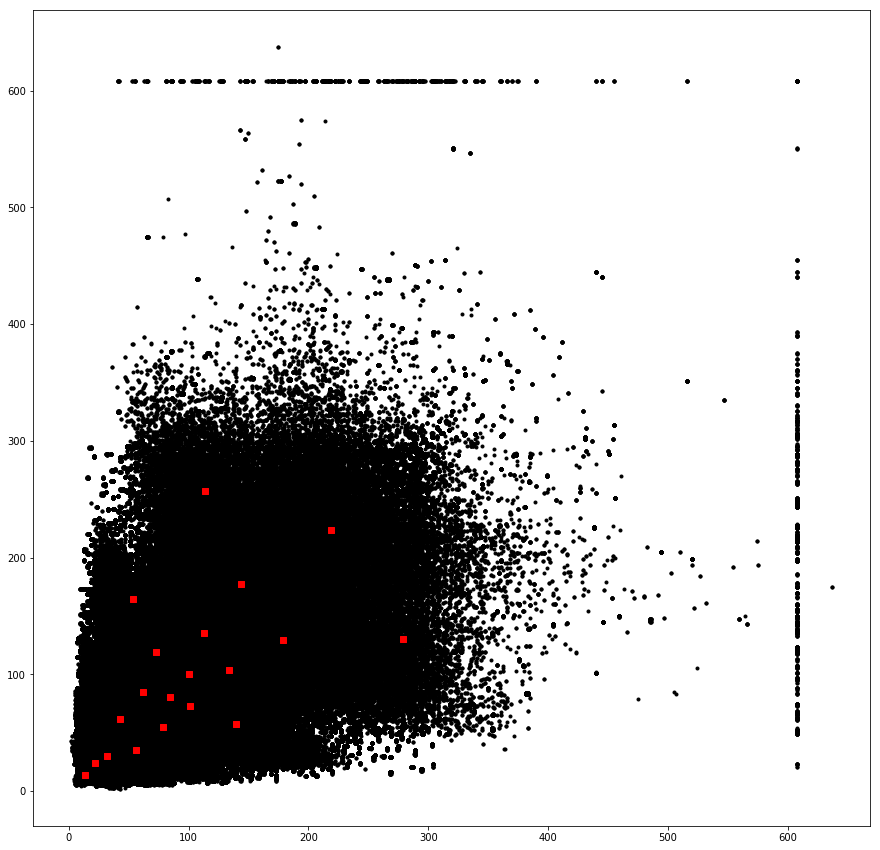

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
#1class: 12,12,  28,29,  40,65,  62,43,  77,84,  108,63,  78,129,  113,103,  197,89,  142,145,  127,227,  220,183,  277,285,  573,255,  337,595
#11 classes: 12,12,  28,28,  65,40,  43,63,  84,77,  67,110,  129,76,  106,112,  93,192,  148,140,  232,122,  185,217,  284,277,  264,577,  587,314
"""

plt.show()

#### sizes_new, kmeans 15

In [ ]:
# get the number of boxes that is bigger > 600
w_large = [size for size in sizes if size[0] > 600]
h_large = [size for size in sizes if size[1] > 600]
print("  ", "total", len(sizes), "w_large", len(w_large), "h_large", len(h_large))

In [ ]:
# remove abnormal boxes
sizes_new = [size for size in sizes if size[0] < 600 and size[1] < 600]
print("  ", "sizes_new total", len(sizes_new))


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  27,28,  55,35,  38,58,  76,65,  62,96,  124,63,  97,94,  91,137,  133,113,  231,111,  160,163,  114,230,  222,233,  346,298
"""

plt.show()

#### sizes, cv2.kmeans2 15

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
13,13,  29,34,  49,27,  69,50,  54,77,  101,75,  85,108,  192,75,  127,119,  112,193,  193,162,  244,258,  535,247,  248,583,  556,560
"""

plt.show()

#### sizes_new, cv2.kmeans2 15

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  26,27,  48,29,  26,59,  48,53,  80,63,  59,94,  129,61,  94,100,  130,114,  96,173,  229,113,  171,175,  194,291,  308,246
"""

plt.show()

### kmeans

In [5]:
def kmeans_cluster(features, K, batch_size):
    X = np.asarray(features)
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    estimator = MiniBatchKMeans(n_clusters=K, random_state=1, batch_size=batch_size, compute_labels=True)
    estimator.fit(X)
    cluster_centers_ = estimator.cluster_centers_
    return cluster_centers_

In [6]:
cluster_centers_ = kmeans_cluster(sizes, K=20, batch_size=128)

In [7]:
# X = np.array(sizes)
# kmeans = KMeans(n_clusters=15, random_state=1).fit(X)
# cluster_centers_ = kmeans.cluster_centers_

In [8]:
centers = []
for center in cluster_centers_:
    print("du", center)
    centers.append(center)
print(centers)

du [43.0202855 61.4417731]
du [113.08444444 135.28740741]
du [21.55161185 23.98241615]
du [218.8697318  223.33716475]
du [84.85072564 80.52868003]
du [279.23893805 130.11504425]
du [101.43621399  72.9526749 ]
du [139.2434555   57.43979058]
du [178.67679558 129.74033149]
du [ 72.46444781 118.76853253]
du [13.79007378 13.50905433]
du [78.49630238 54.59737058]
du [100.15428571 100.54571429]
du [113.5959596  257.47474747]
du [31.66773163 30.23277042]
du [ 54.0308642  164.69753086]
du [56.13777268 35.59471871]
du [61.5954023  84.51954023]
du [134.12436975 104.07731092]
du [143.36197917 177.17447917]
[array([43.0202855, 61.4417731]), array([113.08444444, 135.28740741]), array([21.55161185, 23.98241615]), array([218.8697318 , 223.33716475]), array([84.85072564, 80.52868003]), array([279.23893805, 130.11504425]), array([101.43621399,  72.9526749 ]), array([139.2434555 ,  57.43979058]), array([178.67679558, 129.74033149]), array([ 72.46444781, 118.76853253]), array([13.79007378, 13.50905433]), 

In [9]:
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)

{29248: array([113.5959596 , 257.47474747]), 15298: array([113.08444444, 135.28740741]), 516: array([21.55161185, 23.98241615]), 5206: array([61.5954023 , 84.51954023]), 13959: array([134.12436975, 104.07731092]), 7400: array([101.43621399,  72.9526749 ]), 957: array([31.66773163, 30.23277042]), 25400: array([143.36197917, 177.17447917]), 36333: array([279.23893805, 130.11504425]), 1998: array([56.13777268, 35.59471871]), 23181: array([178.67679558, 129.74033149]), 6832: array([84.85072564, 80.52868003]), 48881: array([218.8697318 , 223.33716475]), 2643: array([43.0202855, 61.4417731]), 7998: array([139.2434555 ,  57.43979058]), 10070: array([100.15428571, 100.54571429]), 8898: array([ 54.0308642 , 164.69753086]), 186: array([13.79007378, 13.50905433]), 4285: array([78.49630238, 54.59737058]), 8606: array([ 72.46444781, 118.76853253])}


In [10]:
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))

[(186, array([13.79007378, 13.50905433])), (516, array([21.55161185, 23.98241615])), (957, array([31.66773163, 30.23277042])), (1998, array([56.13777268, 35.59471871])), (2643, array([43.0202855, 61.4417731])), (4285, array([78.49630238, 54.59737058])), (5206, array([61.5954023 , 84.51954023])), (6832, array([84.85072564, 80.52868003])), (7400, array([101.43621399,  72.9526749 ])), (7998, array([139.2434555 ,  57.43979058])), (8606, array([ 72.46444781, 118.76853253])), (8898, array([ 54.0308642 , 164.69753086])), (10070, array([100.15428571, 100.54571429])), (13959, array([134.12436975, 104.07731092])), (15298, array([113.08444444, 135.28740741])), (23181, array([178.67679558, 129.74033149])), (25400, array([143.36197917, 177.17447917])), (29248, array([113.5959596 , 257.47474747])), (36333, array([279.23893805, 130.11504425])), (48881, array([218.8697318 , 223.33716475]))]
  13,13,  21,23,  31,30,  56,35,  43,61,  78,54,  61,84,  84,80,  101,72,  139,57,  72,118,  54,164,  100,100,  

### cv2.kmeans2

In [ ]:
import cv2

In [ ]:
X = np.array(sizes_new, dtype=np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, label, centers = cv2.kmeans(X, 15, None, criteria, 10, flags)

In [ ]:
print(centers)
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))